In this project, I will be using the popular Python library, Pandas, to explore and analyze a Kaggle dataset containing Airbnb prices in various European cities. Pandas offers a wide range of powerful functions for data manipulation, cleaning, visualization, and analysis, making it an ideal tool for examining and understanding complex datasets like this one. Through this project, we aim to showcase some of the most common and useful functions in Pandas, as well as provide insights into the pricing trends and patterns of Airbnb rentals across different European cities.

In [1]:
import glob
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
import folium


The code is combining multiple CSV files containing Airbnb price data for different European cities into a single dataframe, which is then stored in a variable called "all_prices". The resulting dataframe will have columns for the city name, weekend/weekday information, and Airbnb prices for each city.
Both "concat" and "read_csv" are pandas functions, while glob is provided by the glob library.

In [2]:
def concat(name):
    files= glob.glob(name)
    df_list = []
    for filename in files:
        data = pd.read_csv(filename)
        # Extract city name and weekend/weekday information from file name
        city_name, day_type = re.match(r'^(.+)_([a-z]+)\.csv$', os.path.basename(filename)).groups()
        data['City'] = city_name
        data['Weekend_Weekday'] = day_type
        df_list.append(data)
    df = pd.concat(df_list)
    return df

all_prices = concat("Airbnb_prices/*").reset_index()
all_prices

,index,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,City,Weekend_Weekday
0,0,0,194.033698,Private room,False,True,2.0,False,1,0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekdays
1,1,1,344.245776,Private room,False,True,4.0,False,0,0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekdays
2,2,2,264.101422,Private room,False,True,2.0,False,0,1,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekdays
3,3,3,433.529398,Private room,False,True,4.0,False,0,1,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekdays
4,4,4,485.552926,Private room,False,True,2.0,True,0,0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekdays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,5374,5374,1035.066676,Private room,False,True,2.0,False,0,1,...,5.155373,0.883829,271.191201,18.851558,528.042180,9.451035,-0.05357,51.51255,london,weekends
51703,5375,5375,181.095510,Private room,False,True,2.0,False,1,0,...,5.072177,0.344055,268.165870,18.641255,554.906232,9.931855,-0.05620,51.51823,london,weekends
51704,5376,5376,420.517886,Entire home/apt,False,False,2.0,False,0,0,...,6.709982,0.926188,181.892001,12.644022,395.397885,7.076933,-0.22172,51.52180,london,weekends
51705,5377,5377,217.314612,Private room,False,True,2.0,False,0,0,...,6.736940,0.353634,184.278328,12.809905,471.029678,8.430610,-0.22286,51.49715,london,weekends


After concatenating multiple CSV files and resetting the indexes, the resulting dataframe contains two unwanted columns called "index" and "Unnamed: 0". To remove these columns, we can make use of the "drop" function provided by Pandas.

In [3]:
all_prices = all_prices.drop(['index', 'Unnamed: 0'], axis=1)

When working with a new dataset, it is important to check for duplicates as they can affect the accuracy and reliability of our analysis. Pandas provides a function called "duplicated" that returns a boolean value of "True" if there are duplicate rows in a dataframe and "False" if there are none. This function can be used to identify and handle duplicate values in the dataset.

In [4]:
all_prices.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
51702    False
51703    False
51704    False
51705    False
51706    False
Length: 51707, dtype: bool

When working with large dataframes, it may be more convenient to view only a subset of the data instead of the entire dataset. Pandas provides a function called "head" that allows us to specify the number of top rows we want to display. By default, this function displays the first 5 rows of the dataframe. This feature can help us get a quick overview of the dataset and make it easier to work with.

In [5]:
all_prices.head(10)

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,City,Weekend_Weekday
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekdays
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekdays
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekdays
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekdays
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekdays
5,552.808567,Private room,False,True,3.0,False,0,0,8.0,100.0,...,2.131420,1.904668,174.788957,9.255191,225.201662,15.692376,4.87699,52.38966,amsterdam,weekdays
6,215.124317,Private room,False,True,2.0,False,0,0,10.0,94.0,...,1.881092,0.729747,200.167652,10.599010,242.765524,16.916251,4.91570,52.38296,amsterdam,weekdays
7,2771.307384,Entire home/apt,False,False,4.0,True,0,0,10.0,100.0,...,1.686807,1.458404,208.808109,11.056528,272.313823,18.975219,4.88467,52.38749,amsterdam,weekdays
8,1001.804420,Entire home/apt,False,False,4.0,False,0,0,9.0,96.0,...,3.719141,1.196112,106.226456,5.624761,133.876202,9.328686,4.86459,52.40175,amsterdam,weekdays
9,276.521454,Private room,False,True,2.0,False,1,0,10.0,88.0,...,3.142361,0.924404,206.252862,10.921226,238.291258,16.604478,4.87600,52.34700,amsterdam,weekdays


In [6]:
all_prices.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,City,Weekend_Weekday
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekdays
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekdays
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekdays
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekdays
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekdays


The "info" function is a useful tool provided by Pandas for obtaining a summary of a dataframe's structure and contents. It provides information such as the total number of rows, the data types of each column, and the amount of memory used by the dataframe. This function can help us quickly assess the overall quality of the dataset and identify potential issues such as missing or inconsistent data.

In [7]:
all_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_shared                 51707 non-null  bool   
 3   room_private                51707 non-null  bool   
 4   person_capacity             51707 non-null  float64
 5   host_is_superhost           51707 non-null  bool   
 6   multi                       51707 non-null  int64  
 7   biz                         51707 non-null  int64  
 8   cleanliness_rating          51707 non-null  float64
 9   guest_satisfaction_overall  51707 non-null  float64
 10  bedrooms                    51707 non-null  int64  
 11  dist                        51707 non-null  float64
 12  metro_dist                  51707 non-null  float64
 13  attr_index                  517

The "dtypes" function is a Pandas method that can be used to display the data type of each column in a dataframe. This function can be useful in situations where we need to ensure that the data types of our variables are appropriate for the type of analysis we want to perform. It can also be used to identify and handle columns with mixed data types.

In [8]:
all_prices.dtypes

realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
City                           object
Weekend_Weekday                object
dtype: object

The "astype" function is a Pandas method used to change the data type of a column in a dataframe to a different data type. This function can be useful in situations where the data type of a column needs to be modified to better suit our analysis, or to address errors such as data type mismatches. The "astype" function can also be used to convert a column to a categorical data type, which can help save memory and speed up certain types of analysis.

In [9]:
all_prices['room_type'] = all_prices['room_type'].astype("string")
all_prices.dtypes

realSum                       float64
room_type                      string
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
City                           object
Weekend_Weekday                object
dtype: object

The "shape" function is a built-in attribute in Pandas that returns a tuple containing the number of rows and columns in a dataframe. This function is useful in determining the overall size and dimensions of a dataset, which can help with memory management and performance optimization.

In [10]:
all_prices.shape

(51707, 21)

The "describe" function is a Pandas method that provides a summary of the central tendency, dispersion, and shape of a dataframe's distribution. It returns a table that includes the count, mean, standard deviation, minimum, and maximum values for each column in the dataset. This function is particularly useful in getting a quick overview of the dataset's distribution and identifying potential issues such as outliers, missing values, or data inconsistencies. By default, the "describe" function only includes numeric columns, but it can be modified to include non-numeric columns as well.

In [11]:
all_prices.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128
std,327.948386,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000
25%,148.752174,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510
50%,211.343089,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690
75%,319.694287,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410


The "sample" function is a Pandas method that can be used to extract a random sample of rows from a dataframe. This function is useful in situations where we want to obtain a representative subset of the data for exploratory analysis or testing purposes. The "sample" function can be used to specify the number of rows to extract, as well as whether to sample with or without replacement.

In [12]:
all_prices.sample(n=5)

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,City,Weekend_Weekday
45258,135.787992,Private room,False,True,3.0,False,0,1,10.0,92.0,...,2.157147,0.239492,116.673689,3.851899,367.471703,16.434706,-9.13426,38.73135,lisbon,weekdays
2067,370.284172,Entire home/apt,False,False,4.0,False,0,1,10.0,90.0,...,1.472758,0.179027,353.459069,13.647463,943.862878,20.733496,2.15241,41.38763,barcelona,weekends
49190,168.160117,Private room,False,True,2.0,False,0,0,10.0,97.0,...,6.053853,0.174007,211.430226,14.697339,487.977017,8.733938,-0.21310,51.49798,london,weekends
28369,98.625783,Private room,False,True,2.0,False,0,0,10.0,93.0,...,13.963123,4.439275,32.753332,4.992282,44.974826,9.515306,13.31153,52.41554,berlin,weekends
29578,108.245856,Private room,False,True,2.0,False,0,1,10.0,100.0,...,5.750754,0.201488,129.174003,2.861907,418.841628,9.125543,12.54800,41.86200,rome,weekends


The "isnull" function is a Pandas method that returns a boolean dataframe of the same shape as the input dataframe, where each element is "True" if the corresponding element in the input is missing or "NaN", and "False" otherwise. This function is useful in identifying the locations of missing data in a dataset, which can then be used to decide how to handle the missing values.

To further analyze the missing values in a dataframe, we can add the "sum" function to the "isnull" function to obtain a count of the number of missing values in each column. The resulting output will provide a summary of the number of missing values in each column of the dataframe. This information can be used to make informed decisions about how to handle the missing data, such as imputing the missing values or dropping the rows or columns that contain missing data.

In [13]:
all_prices.isnull().sum()

realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
City                          0
Weekend_Weekday               0
dtype: int64

The "isna" function in Pandas is similar to the "isnull" function, and it returns a boolean dataframe of the same shape as the input dataframe, where each element is "True" if the corresponding element in the input is missing or "NaN", and "False" otherwise. The only difference between "isna" and "isnull" is the name of the function, as they both produce the same output.

To check if there are any missing values in a dataframe, we can use the "any" function in conjunction with the "isna" function. The "any" function checks if there are any "True" values in the boolean dataframe returned by the "isna" function. If there are any missing values in the dataframe, the "any" function will return "True", otherwise, it will return "False". The resulting output can be used as a quick check to see if there are any missing values in the dataset that need to be handled.

In [14]:
all_prices.isna().any()

realSum                       False
room_type                     False
room_shared                   False
room_private                  False
person_capacity               False
host_is_superhost             False
multi                         False
biz                           False
cleanliness_rating            False
guest_satisfaction_overall    False
bedrooms                      False
dist                          False
metro_dist                    False
attr_index                    False
attr_index_norm               False
rest_index                    False
rest_index_norm               False
lng                           False
lat                           False
City                          False
Weekend_Weekday               False
dtype: bool

The "nunique" function in Pandas returns the number of unique elements in a column of a dataframe. This function can be used to determine the number of distinct values in a column and to identify potential categorical variables. The resulting output can help with further data exploration and analysis, such as identifying outliers or performing feature engineering.

In [15]:
all_prices.nunique()

realSum                       10497
room_type                         3
room_shared                       2
room_private                      2
person_capacity                   5
host_is_superhost                 2
multi                             2
biz                               2
cleanliness_rating                9
guest_satisfaction_overall       53
bedrooms                         10
dist                          51707
metro_dist                    51707
attr_index                    51707
attr_index_norm               51688
rest_index                    51707
rest_index_norm               51688
lng                           23600
lat                           21484
City                             10
Weekend_Weekday                   2
dtype: int64

The ".columns" attribute in Pandas is used to retrieve the column labels of a dataframe. It returns a pandas Index object representing the column labels

In [16]:
all_prices.columns

Index(['realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'City', 'Weekend_Weekday'],
      dtype='object')

The "nlargest" and "nsmallest" functions in Pandas are used to retrieve the top n largest or smallest values in a column of a dataframe, respectively. These functions are useful for identifying extreme values or outliers in the data. The function takes in two arguments, the first being the number of largest values to retrieve, and the second being the column to retrieve the values from.

In [17]:
#checking the most expensive 3 airbnbs:
all_prices.nlargest(3, 'realSum')

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,City,Weekend_Weekday
35451,18545.450285,Entire home/apt,False,False,2.0,True,0,1,10.0,100.0,...,1.196536,0.381128,134.904353,5.086455,275.573716,20.691752,23.73200,37.98600,athens,weekdays
38942,16445.614689,Entire home/apt,False,False,2.0,False,0,0,9.0,100.0,...,4.602378,0.118665,260.896109,12.700335,545.826245,32.072497,2.29772,48.83669,paris,weekdays
13855,15499.894165,Entire home/apt,False,False,3.0,True,0,1,10.0,95.0,...,0.269101,0.227193,1100.391676,76.489446,2358.358493,42.228377,-0.13038,51.50995,london,weekdays


To improve the clarity and understanding of the data, it may be helpful to rename a column in Pandas. In this case, the column "real Sum" could be renamed to "Price" using the "rename" function in Pandas.

In [18]:
all_prices = all_prices.rename(columns = {'realSum' : "Price"})

The "iloc" and "loc" functions in Pandas are used to select specific rows and columns in a dataframe based on their integer position or label, respectively.

The "iloc" function selects rows and columns based on their integer position, while the "loc" function selects rows and columns based on their labels. The "iloc" function uses integer indexing, whereas the "loc" function uses label indexing. Both functions can be used with single labels or integer positions, as well as with lists or slices of labels or integer positions. The "iloc" function can also be used with boolean masks.

In [19]:
all_prices.iloc[:2, :6]

,Price,room_type,room_shared,room_private,person_capacity,host_is_superhost
0,194.033698,Private room,False,True,2.0,False
1,344.245776,Private room,False,True,4.0,False


In [20]:
all_prices.loc[:5, ['host_is_superhost', 'person_capacity']]

,host_is_superhost,person_capacity
0,False,2.0
1,False,4.0
2,False,2.0
3,False,4.0
4,True,2.0
5,False,3.0


Slicing in Pandas refers to selecting a subset of data from a dataframe based on specific criteria, such as row or column labels or integer positions.

In [21]:
all_prices[11:16]

,Price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,City,Weekend_Weekday
11,319.640053,Private room,False,True,2.0,True,1,0,10.0,97.0,...,2.182707,1.590381,191.501339,10.140123,229.297401,15.977773,4.92496,52.37107,amsterdam,weekdays
12,675.602840,Entire home/apt,False,False,4.0,False,0,0,8.0,87.0,...,2.933046,0.628073,214.923342,11.380334,269.624904,18.787851,4.88934,52.34697,amsterdam,weekdays
13,552.808567,Entire home/apt,False,False,2.0,True,0,0,10.0,100.0,...,1.305494,1.342162,325.255952,17.222519,390.912052,27.239314,4.87417,52.37509,amsterdam,weekdays
14,209.031472,Private room,False,True,2.0,False,1,0,8.0,96.0,...,7.304535,3.720814,59.776181,3.165188,75.701057,5.274959,4.99679,52.35645,amsterdam,weekdays
15,368.851499,Private room,False,True,2.0,True,0,0,10.0,98.0,...,1.031101,0.557885,359.921932,19.058105,439.950562,30.656388,4.90809,52.37455,amsterdam,weekdays


In Pandas, the "groupby" function is used to group data based on one or more columns and apply a function to each group. This function can be any operation that can be performed on a dataframe, such as sum, mean, count, etc. Grouping data can be useful for analyzing patterns or trends within subsets of the data and gaining insights into the relationships between different variables.

In [22]:
grouped = all_prices[['City', 'Weekend_Weekday', 'Price']].groupby(['City', 'Weekend_Weekday'])['Price'].mean().reset_index()
grouped

,City,Weekend_Weekday,Price
0,amsterdam,weekdays,545.020526
1,amsterdam,weekends,604.828018
2,athens,weekdays,155.866982
3,athens,weekends,147.580456
4,barcelona,weekdays,288.391667
5,barcelona,weekends,300.277940
6,berlin,weekdays,240.220422
7,berlin,weekends,249.252516
8,budapest,weekdays,168.429367
9,budapest,weekends,185.120628


The 'pivot_table' function is used to create a new table from an existing dataframe by specifying one or more columns to use as row and column labels and aggregating data using a function such as sum or mean. This function is useful for summarizing and analyzing large amounts of data and allows for easy comparisons and visualization of trends and patterns in the data.

In [23]:
pivoted = all_prices.pivot_table(index='City', columns='Weekend_Weekday', values='Price')
pivoted.columns = ['Price on a Weekend', 'Price on a Weekday']

print(pivoted)

           Price on a Weekend  Price on a Weekday
City                                             
amsterdam          545.020526          604.828018
athens             155.866982          147.580456
barcelona          288.391667          300.277940
berlin             240.220422          249.252516
budapest           168.429367          185.120628
lisbon             236.345459          240.044051
london             360.230348          364.389747
paris              398.786678          387.028589
rome               201.618053          209.130063
vienna             240.384834          242.739524


In Pandas, the "sort_values" function is used to sort the values of a dataframe or series by one or more columns in ascending or descending order. This function is useful for organizing and analyzing large amounts of data and allows for easy identification of patterns and trends in the data.

In [24]:
pivoted.sort_values(by= 'Price on a Weekend', ascending = False)

,Price on a Weekend,Price on a Weekday
City,,
amsterdam,545.020526,604.828018
paris,398.786678,387.028589
london,360.230348,364.389747
barcelona,288.391667,300.277940
vienna,240.384834,242.739524
berlin,240.220422,249.252516
lisbon,236.345459,240.044051
rome,201.618053,209.130063
budapest,168.429367,185.120628


In Pandas, the "query" function is used to filter the rows of a dataframe based on a boolean expression. This function allows for a more concise and readable way to select rows compared to traditional boolean indexing. The query expression can reference column names without using the dataframe name and supports common operators such as ==, !=, >, <, >=, and <=.

In [25]:
all_prices.query('guest_satisfaction_overall > 99')

,Price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,City,Weekend_Weekday
5,552.808567,Private room,False,True,3.0,False,0,0,8.0,100.0,...,2.131420,1.904668,174.788957,9.255191,225.201662,15.692376,4.87699,52.38966,amsterdam,weekdays
7,2771.307384,Entire home/apt,False,False,4.0,True,0,0,10.0,100.0,...,1.686807,1.458404,208.808109,11.056528,272.313823,18.975219,4.88467,52.38749,amsterdam,weekdays
13,552.808567,Entire home/apt,False,False,2.0,True,0,0,10.0,100.0,...,1.305494,1.342162,325.255952,17.222519,390.912052,27.239314,4.87417,52.37509,amsterdam,weekdays
32,516.017154,Entire home/apt,False,False,4.0,False,0,0,9.0,100.0,...,1.071168,0.382535,487.873022,25.833201,702.928876,48.981095,4.88881,52.36397,amsterdam,weekdays
33,602.254353,Entire home/apt,False,False,3.0,False,0,0,10.0,100.0,...,3.856290,0.727962,148.724103,7.875040,184.259848,12.839491,4.86021,52.34502,amsterdam,weekdays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51696,1213.575108,Entire home/apt,False,False,5.0,False,0,1,10.0,100.0,...,4.307253,0.402588,342.800397,23.829392,739.860266,13.242210,-0.06696,51.51675,london,weekends
51700,90.547755,Private room,False,True,2.0,False,0,0,10.0,100.0,...,12.200414,3.080764,103.298588,7.180688,207.527974,3.714389,0.04661,51.49376,london,weekends
51701,362.191020,Entire home/apt,False,False,4.0,False,0,0,8.0,100.0,...,8.551082,1.168158,131.619294,9.149370,304.939017,5.457877,-0.18818,51.44146,london,weekends
51702,1035.066676,Private room,False,True,2.0,False,0,1,10.0,100.0,...,5.155373,0.883829,271.191201,18.851558,528.042180,9.451035,-0.05357,51.51255,london,weekends


With Pandas' 'insert' function, it is possible to add a new column at a specific index in a DataFrame. The insert function requires three parameters: the index position where the new column should be inserted, the name of the new column, and the values that should populate the new column. As an example, if we need to create a new column to indicate whether the price per night is within our budget and we want to add it to the front of the DataFrame instead of the end, we can use the insert function.

In [26]:
new_column = all_prices['Price'].apply(lambda x: "yes" if x < 300 else 'no')
all_prices.insert(1, 'Within budget', new_column)
all_prices

,Price,Within budget,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,City,Weekend_Weekday
0,194.033698,yes,Private room,False,True,2.0,False,1,0,10.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekdays
1,344.245776,no,Private room,False,True,4.0,False,0,0,8.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekdays
2,264.101422,yes,Private room,False,True,2.0,False,0,1,9.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekdays
3,433.529398,no,Private room,False,True,4.0,False,0,1,9.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekdays
4,485.552926,no,Private room,False,True,2.0,True,0,0,10.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekdays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,1035.066676,no,Private room,False,True,2.0,False,0,1,10.0,...,5.155373,0.883829,271.191201,18.851558,528.042180,9.451035,-0.05357,51.51255,london,weekends
51703,181.095510,yes,Private room,False,True,2.0,False,1,0,10.0,...,5.072177,0.344055,268.165870,18.641255,554.906232,9.931855,-0.05620,51.51823,london,weekends
51704,420.517886,no,Entire home/apt,False,False,2.0,False,0,0,10.0,...,6.709982,0.926188,181.892001,12.644022,395.397885,7.076933,-0.22172,51.52180,london,weekends
51705,217.314612,yes,Private room,False,True,2.0,False,0,0,10.0,...,6.736940,0.353634,184.278328,12.809905,471.029678,8.430610,-0.22286,51.49715,london,weekends


The 'where' function in Pandas allows us to perform conditional operations on a DataFrame or Series. It takes a condition as an input and returns a new object with the same shape as the original, where the values that do not meet the condition are replaced with NaN or a specified value.

To remove NaN, we can use 'dropna' function. We can use the function with default parameters to remove all rows that have at least one missing value, or we can specify the axis and the number of non-missing values required to keep a row or a column.

In [27]:
all_prices.where(all_prices['Within budget'] == 'yes').dropna()

,Price,Within budget,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,City,Weekend_Weekday
0,194.033698,yes,Private room,False,True,2.0,False,1.0,0.0,10.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekdays
2,264.101422,yes,Private room,False,True,2.0,False,0.0,1.0,9.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekdays
6,215.124317,yes,Private room,False,True,2.0,False,0.0,0.0,10.0,...,1.881092,0.729747,200.167652,10.599010,242.765524,16.916251,4.91570,52.38296,amsterdam,weekdays
9,276.521454,yes,Private room,False,True,2.0,False,1.0,0.0,10.0,...,3.142361,0.924404,206.252862,10.921226,238.291258,16.604478,4.87600,52.34700,amsterdam,weekdays
14,209.031472,yes,Private room,False,True,2.0,False,1.0,0.0,8.0,...,7.304535,3.720814,59.776181,3.165188,75.701057,5.274959,4.99679,52.35645,amsterdam,weekdays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51690,111.244385,yes,Private room,False,True,2.0,False,1.0,0.0,9.0,...,6.834628,0.821992,177.042897,12.306942,384.266607,6.877703,-0.22293,51.52345,london,weekends
51697,289.988005,yes,Entire home/apt,False,False,2.0,False,0.0,1.0,9.0,...,7.413283,0.507324,163.954478,11.397115,385.327220,6.896686,-0.23339,51.49979,london,weekends
51700,90.547755,yes,Private room,False,True,2.0,False,0.0,0.0,10.0,...,12.200414,3.080764,103.298588,7.180688,207.527974,3.714389,0.04661,51.49376,london,weekends
51703,181.095510,yes,Private room,False,True,2.0,False,1.0,0.0,10.0,...,5.072177,0.344055,268.165870,18.641255,554.906232,9.931855,-0.05620,51.51823,london,weekends


The 'isin' function in Pandas allows us to filter rows based on whether a column value is included in a list of specified values. We can use this function to extract a subset of rows based on multiple conditions by passing a list of values for each condition.

In [28]:
city = ['paris', 'london']
all_prices[all_prices['City'].isin(city)]

,Price,Within budget,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,City,Weekend_Weekday
11969,570.098074,no,Entire home/apt,False,False,2.0,False,0,0,10.0,...,5.301018,1.588990,209.632578,14.571793,467.597522,8.372724,-0.16032,51.46531,london,weekdays
11970,297.984430,yes,Private room,False,True,2.0,True,1,0,10.0,...,2.198946,0.379262,553.891744,38.501630,961.472137,17.215961,-0.09683,51.50343,london,weekdays
11971,336.790611,no,Private room,False,True,2.0,False,1,0,10.0,...,2.322958,0.453178,428.287849,29.770764,959.042839,17.172462,-0.10554,51.52407,london,weekdays
11972,226.722171,yes,Private room,False,True,2.0,True,1,0,10.0,...,5.707825,1.723977,195.694744,13.602959,452.232472,8.097600,-0.16575,51.46292,london,weekdays
11973,256.355982,yes,Private room,False,True,3.0,False,0,0,9.0,...,3.257945,0.825417,329.477068,22.902317,735.327280,13.166649,-0.12055,51.53728,london,weekdays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,1035.066676,no,Private room,False,True,2.0,False,0,1,10.0,...,5.155373,0.883829,271.191201,18.851558,528.042180,9.451035,-0.05357,51.51255,london,weekends
51703,181.095510,yes,Private room,False,True,2.0,False,1,0,10.0,...,5.072177,0.344055,268.165870,18.641255,554.906232,9.931855,-0.05620,51.51823,london,weekends
51704,420.517886,no,Entire home/apt,False,False,2.0,False,0,0,10.0,...,6.709982,0.926188,181.892001,12.644022,395.397885,7.076933,-0.22172,51.52180,london,weekends
51705,217.314612,yes,Private room,False,True,2.0,False,0,0,10.0,...,6.736940,0.353634,184.278328,12.809905,471.029678,8.430610,-0.22286,51.49715,london,weekends


The 'replace' function in Pandas allows us to replace specified values in a DataFrame or Series. We can replace a single value or multiple values with another value or a dictionary of values. For instance, we may want to replace all occurrences of 'NYC' in the 'City' column with 'New York City'.

In [29]:
all_prices.replace({'no': 'not really'})

,Price,Within budget,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,City,Weekend_Weekday
0,194.033698,yes,Private room,False,True,2.0,False,1,0,10.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekdays
1,344.245776,not really,Private room,False,True,4.0,False,0,0,8.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekdays
2,264.101422,yes,Private room,False,True,2.0,False,0,1,9.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekdays
3,433.529398,not really,Private room,False,True,4.0,False,0,1,9.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekdays
4,485.552926,not really,Private room,False,True,2.0,True,0,0,10.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekdays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,1035.066676,not really,Private room,False,True,2.0,False,0,1,10.0,...,5.155373,0.883829,271.191201,18.851558,528.042180,9.451035,-0.05357,51.51255,london,weekends
51703,181.095510,yes,Private room,False,True,2.0,False,1,0,10.0,...,5.072177,0.344055,268.165870,18.641255,554.906232,9.931855,-0.05620,51.51823,london,weekends
51704,420.517886,not really,Entire home/apt,False,False,2.0,False,0,0,10.0,...,6.709982,0.926188,181.892001,12.644022,395.397885,7.076933,-0.22172,51.52180,london,weekends
51705,217.314612,yes,Private room,False,True,2.0,False,0,0,10.0,...,6.736940,0.353634,184.278328,12.809905,471.029678,8.430610,-0.22286,51.49715,london,weekends


The Pandas function 'pct_change()'computes the percentage change between the current and prior element in a DataFrame or Series. It accepts an optional argument 'periods' to specify the number of periods to shift for computing the percentage change. The function returns a new object with the same shape as the original one, with the percentage change computed for each element. 

In our scenario, we want to compute the percentage change between two columns, add it to a new column, and round the results.

In [30]:
pivoted.loc[:, 'Price_Change'] = pivoted.loc[:, ['Price on a Weekend', 'Price on a Weekday']].pct_change(axis=1).iloc[:, 1]
pivoted['Price_Change'] = round(pivoted['Price_Change'] *100)
pivoted[['Price on a Weekend', 'Price on a Weekday']] = round(pivoted[['Price on a Weekend', 'Price on a Weekday']])
pivoted

,Price on a Weekend,Price on a Weekday,Price_Change
City,,,
amsterdam,545.0,605.0,11.0
athens,156.0,148.0,-5.0
barcelona,288.0,300.0,4.0
berlin,240.0,249.0,4.0
budapest,168.0,185.0,10.0
lisbon,236.0,240.0,2.0
london,360.0,364.0,1.0
paris,399.0,387.0,-3.0
rome,202.0,209.0,4.0


In [31]:
pivoted

,Price on a Weekend,Price on a Weekday,Price_Change
City,,,
amsterdam,545.0,605.0,11.0
athens,156.0,148.0,-5.0
barcelona,288.0,300.0,4.0
berlin,240.0,249.0,4.0
budapest,168.0,185.0,10.0
lisbon,236.0,240.0,2.0
london,360.0,364.0,1.0
paris,399.0,387.0,-3.0
rome,202.0,209.0,4.0


The 'value_counts()' function in Pandas is used to count the occurrences of unique values in a column of a DataFrame. It returns a new Series object with counts of unique values in descending order. This function is useful for understanding the distribution of values in a categorical column.

In [32]:
all_prices['cleanliness_rating'].value_counts()

10.0    30067
9.0     15458
8.0      4352
7.0       947
6.0       501
4.0       143
2.0       143
5.0        86
3.0        10
Name: cleanliness_rating, dtype: int64

When we use the 'value_counts()' function in Pandas, we can set the optional parameter normalize to True to get the relative frequencies instead of the counts. This means that the output will show the proportion of each unique value in the column instead of the number of times it appears.

In [33]:
round(all_prices['cleanliness_rating'].value_counts(normalize = True)*100, 2)

10.0    58.15
9.0     29.90
8.0      8.42
7.0      1.83
6.0      0.97
4.0      0.28
2.0      0.28
5.0      0.17
3.0      0.02
Name: cleanliness_rating, dtype: float64

The 'crosstab' function in Pandas is used to compute a cross-tabulation table that can show the frequency distribution of variables. It takes one or more arrays, and groups the data based on these arrays to show the frequency of each combination. The resulting table can be used to compare different groups or to identify patterns in the data.

In our case, we can test it to see if host being a superhost has an impact on guests' positive rating.

In [34]:
pd.crosstab(all_prices['host_is_superhost'], all_prices['guest_satisfaction_overall'].\
    where(all_prices['guest_satisfaction_overall'] > 90))


guest_satisfaction_overall,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
host_is_superhost,,,,,,,,,,
False,1685,1846,2896,1976,2241,1892,1526,1390,532,8373
True,114,179,433,639,1058,1640,2100,2499,1809,2308


The 'qcut()' function in Pandas is used for performing quantile-based discretization. It discretizes variables into equal-sized buckets based on sample quantiles. It takes two required arguments: the column to be discretized and the number of quantiles to be created. Optionally, we can also pass labels for the quantile ranges. The function returns a new Series with the same shape as the original one but with discrete values.

In [35]:
pd.qcut(all_prices['metro_dist'], q=5).value_counts()



(0.0013, 0.218]    10342
(0.895, 14.274]    10342
(0.218, 0.343]     10341
(0.343, 0.502]     10341
(0.502, 0.895]     10341
Name: metro_dist, dtype: int64

To transform a wide-format DataFrame into a long-format DataFrame, we can use the Pandas 'melt' function. This function takes various parameters such as the columns to identify variables, unpivot columns, and the variable and value columns' names to create. 

This function is helpful when we need to reshape our data for analysis or visualization purposes. In our scenario, we want to combine the "room shared" and "room private" columns into a single "Room" column.

In [36]:
all_prices['room_type_combined'] = all_prices.apply\
    (lambda row: 'Shared room' if row['room_shared'] else 'Private room' if row['room_private'] else 'Other', axis=1)

all_prices = all_prices.drop(['room_shared', 'room_private'], axis=1)

all_prices_new = pd.melt(all_prices, id_vars=['Price', 'Within budget', 'person_capacity', 'host_is_superhost', 'multi', 'biz', 'cleanliness_rating', 'dist', 'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'lng', 'lat', 'City', 'Weekend_Weekday'],\
              value_vars=['room_type_combined'] ,        \
              var_name='Room Type', value_name='Room')
all_prices_new= all_prices_new.drop(['Room Type'], axis=1)
all_prices_new



,Price,Within budget,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,City,Weekend_Weekday,Room
0,194.033698,yes,2.0,False,1,0,10.0,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekdays,Private room
1,344.245776,no,4.0,False,0,0,8.0,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekdays,Private room
2,264.101422,yes,2.0,False,0,1,9.0,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekdays,Private room
3,433.529398,no,4.0,False,0,1,9.0,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekdays,Private room
4,485.552926,no,2.0,True,0,0,10.0,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekdays,Private room
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,1035.066676,no,2.0,False,0,1,10.0,5.155373,0.883829,271.191201,18.851558,528.042180,9.451035,-0.05357,51.51255,london,weekends,Private room
51703,181.095510,yes,2.0,False,1,0,10.0,5.072177,0.344055,268.165870,18.641255,554.906232,9.931855,-0.05620,51.51823,london,weekends,Private room
51704,420.517886,no,2.0,False,0,0,10.0,6.709982,0.926188,181.892001,12.644022,395.397885,7.076933,-0.22172,51.52180,london,weekends,Other
51705,217.314612,yes,2.0,False,0,0,10.0,6.736940,0.353634,184.278328,12.809905,471.029678,8.430610,-0.22286,51.49715,london,weekends,Private room


To investigate the correlation between attribution and the rest index value in our DataFrame, we can use the 'corr' function in Pandas. By applying this function to our DataFrame, we can see the correlation coefficient between the two variables. 

A positive correlation coefficient indicates that as one variable increases, the other variable also tends to increase. In our case, we can see that there is a positive correlation between attribution and rest index value.

In [37]:
all_prices[['attr_index', 'rest_index']].corr()

,attr_index,rest_index
attr_index,1.000000,0.850229
rest_index,0.850229,1.000000


In the second part of my project, I will be analyzing Airbnb pricing data and visualizing it using various Python libraries such as Matplotlib, Folium, and Seaborn. I will be exploring the dataset to gain insights into various factors that affect Airbnb pricing in different regions. 

By plotting bar charts, geospatial maps, histograms, scatter plots, and other visualizations, I aim to create a comprehensive picture of the Airbnb pricing landscape and understand the patterns and trends that shape it.

The 'plot.bar()' function is used to create a vertical bar plot in Matplotlib, a popular Python data visualization library. This function takes the data to be plotted as input, usually in the form of a Pandas DataFrame or a NumPy array, and produces a bar plot with rectangular bars of equal width. The height of each bar represents the value of the corresponding data point. The bar() function can be customized with various arguments such as color, width, edgecolor, etc. to create a visually appealing and informative chart.

We will use it to plot Prices by City on Weekdays and Weekends. Surprisingly, Amsterdam had the highest prices, and its prices are on average higher during the weekdays as opposed to the weekends!


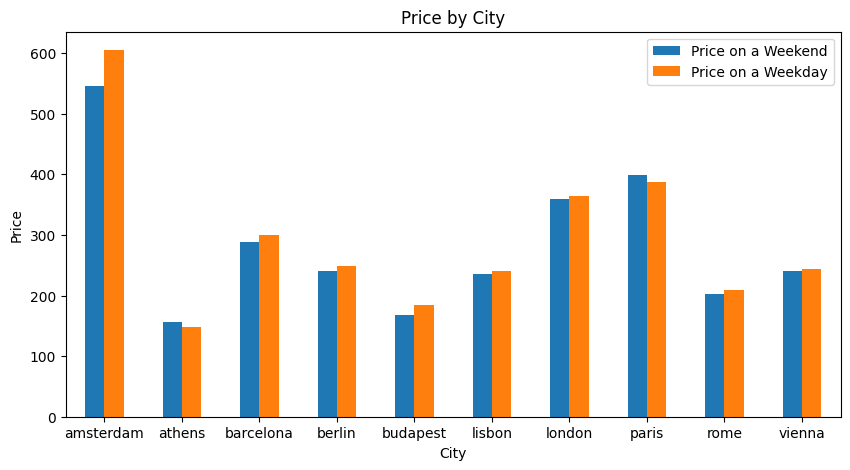

In [38]:
pivoted.plot.bar(rot=0, y=['Price on a Weekend', 'Price on a Weekday'], figsize=(10,5))
plt.ylabel('Price')
plt.title('Price by City')
plt.show()


Folium is a Python library used to create interactive maps. Using Folium, one can create a map of Amsterdam and display prices of a certain product, such as real estate or hotel prices, in different neighborhoods or locations by using markers or color-coded choropleth maps.

We will use it here to show price differences by Amsterdam's neighbourhoods:

In [53]:
amsterdam_data = all_prices.query("City == 'amsterdam'")

avg_price = amsterdam_data.groupby(['lat', 'lng']).agg(avg_price=('Price', 'mean')).reset_index()

amsterdam_map = folium.Map(location=[52.3667, 4.8945], zoom_start=13)
for index, row in avg_price.iterrows():
    if index <= 1300:
        price = row['avg_price']
        lat = row['lat']
        lng = row['lng']
        color = 'red'
        if price <= 300:
            color = 'green'
        elif price <= 500:
            color = 'orange'
        folium.CircleMarker(
            location=[lat, lng],
            radius=2,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7,
            tooltip='Average Price: €{:.2f}'.format(price)
        ).add_to(amsterdam_map)

amsterdam_map



A heatmap can be used to visualize the relationship between distance, cleanliness rating, and price. By plotting these variables on a heatmap, one can quickly identify patterns and correlations between them. For example, areas with high cleanliness ratings may also have higher prices, or there may be a negative correlation between distance from a city center and price.

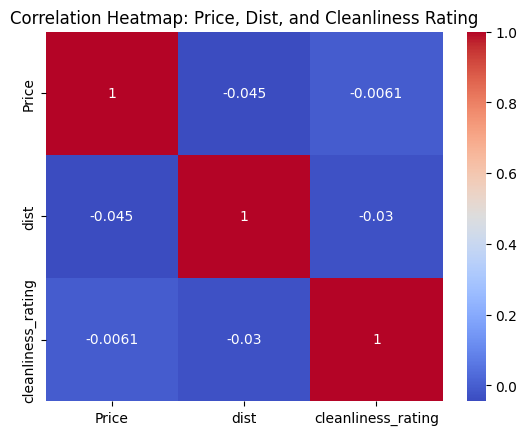

In [40]:
heat_map_df = all_prices[["Price", "dist", "cleanliness_rating"]]

corr_matrix = heat_map_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap: Price, Dist, and Cleanliness Rating")

plt.show()

To create a Folium map showing which cities in the dataset are the most expensive, one could plot markers on a map for each city, with the marker color or size indicating the price of a product such as real estate or hotel prices. 
Cities with more expensive prices would have markers that are larger or have a different color than those with lower prices. This would allow for easy visualization of which cities have the highest prices.

For example, by looking at our dataset, we can quickly identify the most expensive cities to stay at: Amsterdam, Paris and London.

In [41]:
avg_price = all_prices.groupby('City')['Price'].mean()

# Create a map centered on Europe
m = folium.Map(location=[48.6908333, 9.1405556], zoom_start=4)

# Create a marker for each city
for city in avg_price.index:
    # Get the latitude and longitude of the city
    lat = all_prices.loc[all_prices['City'] == city, 'lat'].iloc[0]
    lng = all_prices.loc[all_prices['City'] == city, 'lng'].iloc[0]
    # Get the average price of the city
    price = avg_price[city]
    # Color the marker based on the price
    if price > 300:
        color = 'red'
    elif price > 200:
        color = 'orange'
    else:
        color = 'green'
    # Add the marker to the map
    folium.Marker(location=[lat, lng], tooltip=city, icon=folium.Icon(color=color)).add_to(m)

# Display the map
m

This code creates a histogram of the 'person_capacity' column from the 'all_prices' DataFrame using the Matplotlib library in Python. The histogram has 20 bins and is colored blue. 
The x-axis represents the range of capacity values, while the y-axis represents the frequency of data points that fall within each bin. 

The histogram helps to visualize the distribution of person capacity values in the dataset and to identify any patterns or outliers. 

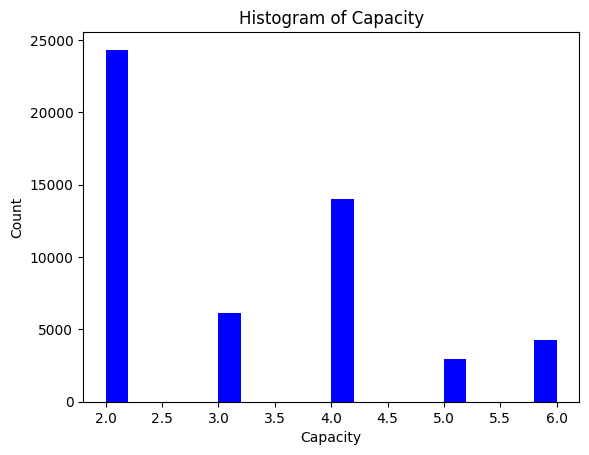

In [42]:
plt.hist(all_prices['person_capacity'], bins=20, color='blue')
plt.xlabel('Capacity')
plt.ylabel('Count')
plt.title('Histogram of Capacity')
plt.show()

The box plot visually displays the spread of prices for each category of room type, including key measures such as the median, quartiles, and any outlier values. The room types are represented on the x-axis, while the prices are shown on the y-axis. 

By examining the box plot, we can compare the price distribution across different types of rooms and identify any anomalies or unexpected trends. 

For instance, the box plot may reveal that prices for Entire Home accommodations can range widely from a few hundred to almost 20,000 per night, whereas Shared room accommodations consistently fall within the lower end of the price range.

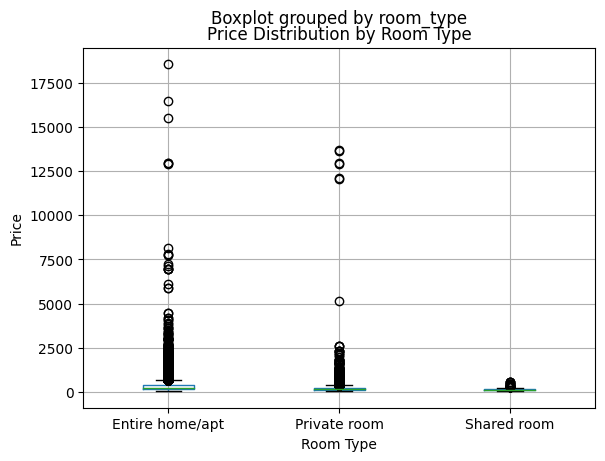

In [43]:
all_prices.boxplot(column="Price", by="room_type")
plt.xlabel("Room Type")
plt.ylabel("Price")
plt.title("Price Distribution by Room Type")
plt.show()

The code provided is calculating the number of Super Hosts and Non-Super Hosts in a dataset, and creating a pie chart using Matplotlib to visualize the proportion of each. 

The pie chart would show that approximately one-fourth of all hosts are Super Hosts, and the rest are Non-Super Hosts. 

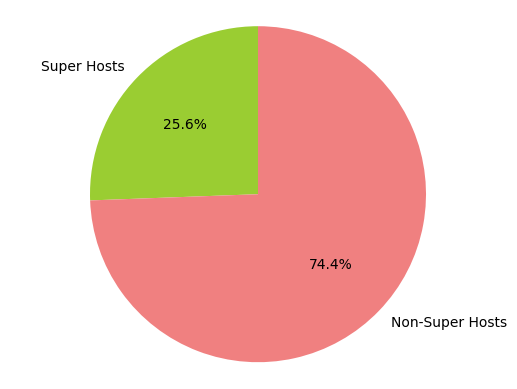

In [44]:
super_hosts = all_prices[all_prices['host_is_superhost'] == True]['host_is_superhost'].count()
non_super_hosts = all_prices[all_prices['host_is_superhost'] == False]['host_is_superhost'].count()
labels = ['Super Hosts', 'Non-Super Hosts']
sizes = [super_hosts, non_super_hosts]
colors = ['yellowgreen', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

Next code creates a scatter plot using Matplotlib that visualizes the relationship between the 'Price' and 'person_capacity' columns from the 'all_prices' DataFrame. 

By examining the scatter plot, we may be able to identify any trends or patterns in the data. For example, we might observe that prices for accommodations close to the city centre vary widely, while prices for accommodations outside of the city centre are relatively stable and have limited supply.

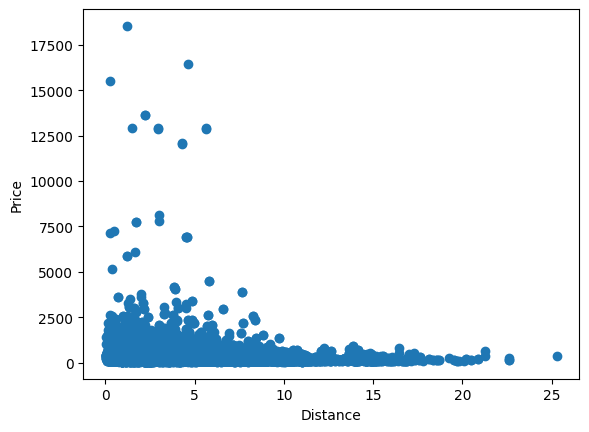

In [45]:
plt.xlabel('Distance')
plt.ylabel('Price')
plt.scatter(x=all_prices['dist'], y=all_prices['Price'])
plt.show()
